## Pynancials

Mariana Frias Coss y León

Sebastián Nin Sánchez

Tecnológico de Monterrey

## Introducción

La consigna elegida para este Hackathon es aquella referente al aumento de la inflación y sus efectos en la cadena de suministro. El enfoque de nuestro trabajo es explicar y pronosticar la inflación de Estados Unidos con base en variables explicativas asociadas a la cadena de suministros.  Muchas de estas vendrán de China, ya que existe una gran dependencia entre estos dos países para la cadena de suministro. Además, queremos determinar el grado de relación de cada una de las siguienes variables con respecto a la inflación:

    • Tarifa global de flete de contenedores (Variable Global)

    • Congestión en puertos de China (Días promedio de retraso) (Variable de China)

    • Precio por barril de petróleo (Variable Global)

    • Ingreso promedio de trabajadores por hora (industria manufacturera) (Variable de USA)

    • Venta mensual de semiconductores (Variable Global)

    • Producción mensual de semiconductores (Variable de China)

    • Inflación (Variable de USA)

Más adelante se mostrarán la metodología y los resultados para elaborar este modelo.

Se importan las librerías:

In [5]:
import refinitiv.dataplatform.eikon as ek
import pandas as pd
import numpy as np
import seaborn as sns
ek.set_app_key('34bb66fb96e74a0f9c51dc36fb473cf27812dc0a')
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.api as sma
from scipy import stats

## Extracción de Variables

Tarifa global de flete de contenedores (Variable Global)

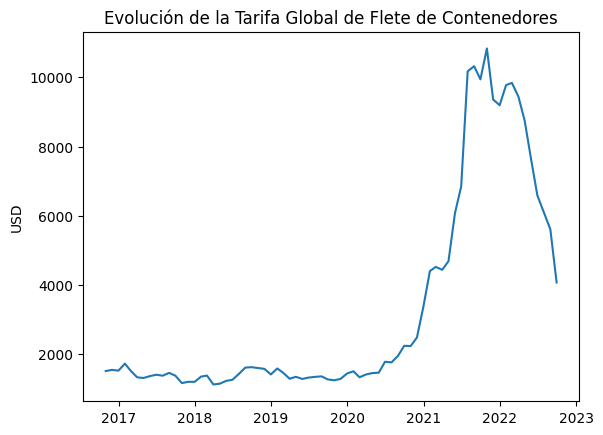

In [6]:
transporte=ek.get_timeseries(['FREIGHTOS-GBL-FBX'], fields = 'CLOSE', start_date = '2016-10-01', end_date='2022-10-25', interval='monthly')
transporte.reset_index(inplace = True)
transporte.rename({'CLOSE':'Precio de transporte'}, axis = 1, inplace= True)
plt.plot(transporte[['Date']], transporte[['Precio de transporte']])
plt.title('Evolución de la Tarifa Global de Flete de Contenedores')
plt.ylabel('USD')
plt.show()
transporte.set_index('Date', inplace = True)

Congestión en puertos de China (Días promedio de retraso)

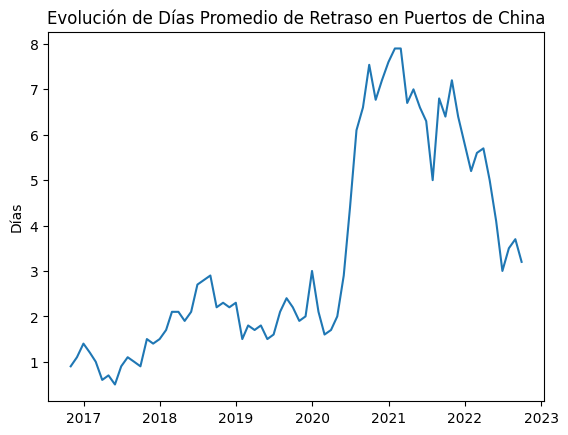

In [7]:
congestion=ek.get_timeseries(['CNCGT=GP'], start_date = '2016-10-01', end_date='2022-10-25', interval='monthly')
congestion.reset_index(inplace = True)
congestion.rename({'CLOSE':'Dias Promedio de Retraso'}, axis = 1, inplace= True)
plt.plot(congestion[['Date']], congestion[['Dias Promedio de Retraso']])
plt.title('Evolución de Días Promedio de Retraso en Puertos de China')
plt.ylabel('Días')
plt.show()
congestion.set_index('Date', inplace = True)

Precio por barril de petróleo en dólares

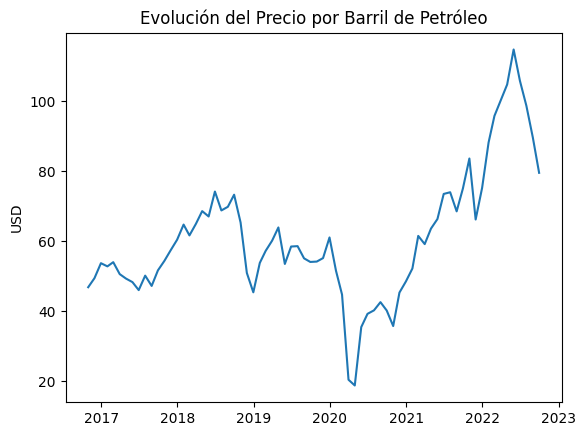

In [8]:
petroleo=ek.get_timeseries(['CLc1'], fields = 'CLOSE', start_date = '2016-10-01', end_date='2022-10-26', interval='monthly')
petroleo.reset_index(inplace = True)
petroleo.rename({'CLOSE':'Precio por barril de petróleo'}, axis = 1, inplace= True)
plt.plot(petroleo[['Date']], petroleo[['Precio por barril de petróleo']])
plt.title('Evolución del Precio por Barril de Petróleo')
plt.ylabel('USD')
plt.show()
petroleo.set_index('Date', inplace = True)

Ingreso promedio de trabajadores por hora en dólares

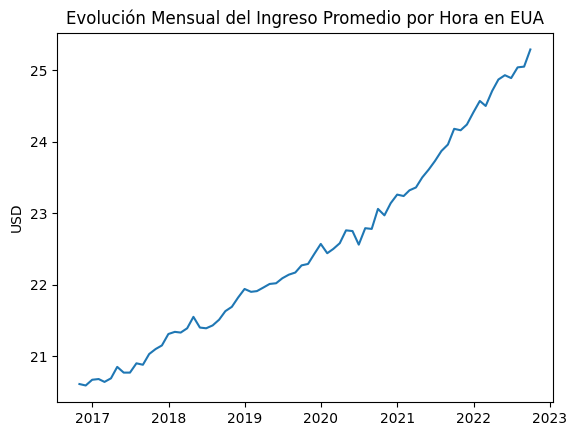

In [9]:
ingreso=ek.get_timeseries(['aUSWAGMANA'], start_date = '2016-10-01', end_date='2022-10-26', interval='monthly')
ingreso.reset_index(inplace = True)
ingreso.rename({'VALUE':'Ingreso promedio por hora'}, axis = 1, inplace= True)
plt.plot(ingreso[['Date']], ingreso[['Ingreso promedio por hora']])
plt.title('Evolución Mensual del Ingreso Promedio por Hora en EUA')
plt.ylabel('USD')
plt.show()
ingreso.set_index('Date', inplace = True)

Inflación de EUA

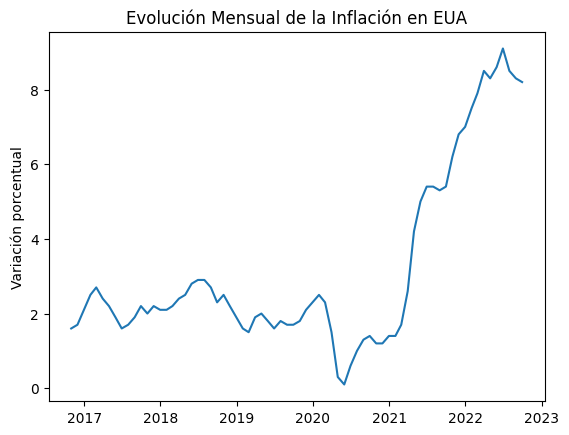

In [10]:
inflacion=ek.get_timeseries(['USCPNY=ECI'], start_date = '2016-10-01', end_date='2022-10-26', interval='monthly')
inflacion.reset_index(inplace = True)
inflacion.rename({'VALUE':'Inflación mensual EUA'}, axis = 1, inplace= True)
plt.plot(inflacion[['Date']], inflacion[['Inflación mensual EUA']])
plt.title('Evolución Mensual de la Inflación en EUA')
plt.ylabel('Variación porcentual')
plt.show()
inflacion.set_index('Date', inplace = True)

Venta mensual de semiconductores en miles de millones de dólares

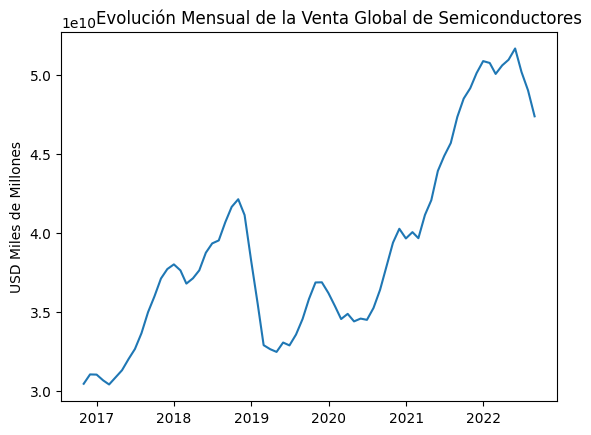

In [11]:
ventas_cond=ek.get_timeseries(['aXWSCSAL3A'], start_date = '2016-10-01', end_date='2022-10-26', interval='monthly')
ventas_cond.reset_index(inplace = True)
ventas_cond.rename({'VALUE':'Venta mensual de semiconductores'}, axis = 1, inplace= True)
plt.plot(ventas_cond[['Date']], ventas_cond[['Venta mensual de semiconductores']])
plt.ticklabel_format(useOffset=False, axis = 'y')
plt.title('Evolución Mensual de la Venta Global de Semiconductores', x = 0.56)
plt.ylabel('USD Miles de Millones')
plt.show()
ventas_cond.set_index('Date', inplace = True)

Producción mensual de semiconductores en miles de millones de dólares

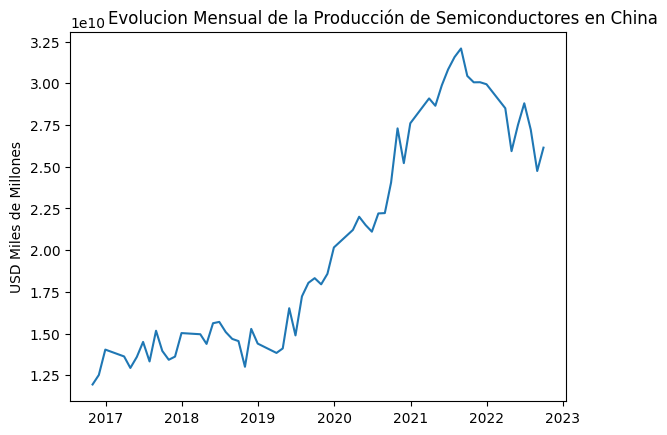

In [12]:
prod_cond=ek.get_timeseries(['aCNCSINC'], start_date = '2016-10-01', end_date='2022-10-26', interval='monthly')
prod_cond.reset_index(inplace = True)
prod_cond.rename({'VALUE':'Producción mensual de semiconductores'}, axis = 1, inplace= True)
plt.plot(prod_cond[['Date']], prod_cond[['Producción mensual de semiconductores']])
plt.title('Evolucion Mensual de la Producción de Semiconductores en China', x = 0.63)
plt.ylabel('USD Miles de Millones')
plt.show()
prod_cond.set_index('Date', inplace = True)

## Elaboración y Limpieza de la Base de Datos

Se concatenan todas las columnas individuales para realizar una sola base de datos

In [13]:
df = pd.concat([transporte,petroleo,ingreso,prod_cond, congestion, ventas_cond, inflacion], axis = 1)

In [14]:
df

,Precio de transporte,Precio por barril de petróleo,Ingreso promedio por hora,Producción mensual de semiconductores,Dias Promedio de Retraso,Venta mensual de semiconductores,Inflación mensual EUA
Date,,,,,,,
2016-10-31,1510.96,46.86,20.61,11949999999.999998,0.9,30427769666.666695,1.6
2016-11-30,1545.28,49.44,20.59,12519999999.999998,1.1,31019906333.333294,1.7
2016-12-31,1523.28,53.72,20.67,14039999999.999998,1.4,31007880333.333298,2.1
2017-01-31,1726.39,52.81,20.68,<NA>,1.2,30641821333.333298,2.5
2017-02-28,1516.52,54.01,20.64,<NA>,1.0,30383167333.333298,2.7
...,...,...,...,...,...,...,...
2022-05-31,7622.0,114.67,24.93,27510000000.0,4.1,51652279999.999992,8.6
2022-06-30,6583.0,105.76,24.89,28797854999.999996,3.0,50168057999.999992,9.1
2022-07-31,6095.0,98.62,25.04,27219999999.999996,3.5,48998620000.0,8.5


Revisamos si existen valores nulos dentro de la base 

In [15]:
df.isnull().sum()

Precio de transporte                      0
Precio por barril de petróleo             0
Ingreso promedio por hora                 0
Producción mensual de semiconductores    12
Dias Promedio de Retraso                  0
Venta mensual de semiconductores          1
Inflación mensual EUA                     0
dtype: int64

Nos damos cuenta de que tenemos 12 valores nulos en la columna de Producción mensual de semiconductores y 1 en el de venta mensual de semiconductores, en el caso de la venta de semiconductores es porque para el mes de septiembre de 2022 no se ha actualizado la información, así que por temas de simplicidad se eliminará la última fila.

In [16]:
df.drop(df.index[len(df)-1], inplace = True)

Para el caso de la producción de semiconductores, decidimos que sería un impacto muy significativo eliminar esas 12 filas, lo que realizamos en este caso fue completar el valor
nulo con el valor del mes anterior.

In [17]:
df.fillna(method = 'bfill', inplace = True)

Revisamos si todavía hay valores nulos

In [18]:
df.isnull().sum()

Precio de transporte                     0
Precio por barril de petróleo            0
Ingreso promedio por hora                0
Producción mensual de semiconductores    0
Dias Promedio de Retraso                 0
Venta mensual de semiconductores         0
Inflación mensual EUA                    0
dtype: int64

Ahora que la base de datos está lista, realizamos una matriz de correlación para evidenciar que existe cierto grado de correlación entre las variables. Esto permite llevar a cabo un análisis econométrico.

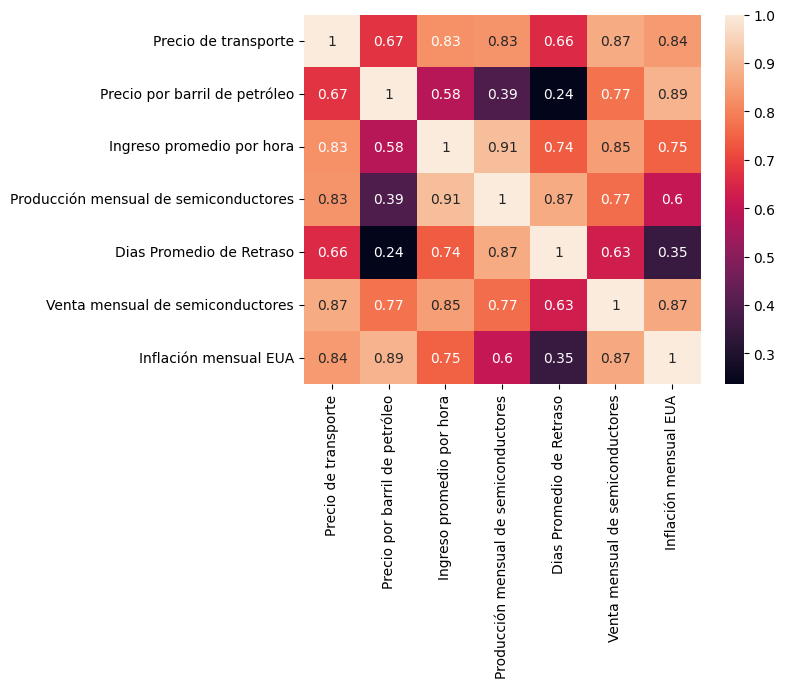

In [19]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Modelo

Para la explicación y pronóstico de la inflación en Estados Unidos se elaboró un modelo de Machine Learning basado en un modelo de regresión lineal, con este mismo se logrará 
relacionar cada variable de la cadena de suministro con la inflación. Adicionalmente, será posible hacer un pronóstico de la inflación manipulando estas mismas variables.

Antes de elaborar el modelo era necesario llevar a cabo una estadarización de los datos, ya que las escalas y unidades de medición diferían de manera significativa en algunas columnas. Por ejemplo, algunas tienen datos entre 0 y 1, mientras que otras tienen datos entre 0 y miles de millones, si no se estandariza, esta tendrá más peso en el modelo que una variable que varíe entre 0 y 1.

In [20]:
scaler = StandardScaler() 
data_scaled = scaler.fit(df.drop('Inflación mensual EUA', axis = 1))
df_scaled = scaler.transform(df.drop('Inflación mensual EUA', axis = 1))
df_scaled

array([[-0.57351918, -0.75559277, -1.40731548, -1.27370001, -1.08051277,
        -1.36912396],
       [-0.56226648, -0.61497845, -1.42254245, -1.18614226, -0.99279176,
        -1.27334251],
       [-0.56947975, -0.38171129, -1.36163456, -0.95265491, -0.86121025,
        -1.27528778],
       [-0.50288486, -0.43130781, -1.35402107, -1.01563505, -0.94893126,
        -1.3344999 ],
       [-0.57169619, -0.36590581, -1.38447502, -1.01563505, -1.03665227,
        -1.37633864],
       [-0.63283522, -0.55175651, -1.34640758, -1.01563505, -1.21209428,
        -1.30236503],
       [-0.63907798, -0.62097363, -1.2245918 , -1.12162602, -1.16823378,
        -1.23067158],
       [-0.621153  , -0.67602032, -1.28549969, -1.02024335, -1.25595479,
        -1.11563413],
       [-0.60830354, -0.80028414, -1.28549969, -0.88199426, -1.08051277,
        -1.01309005],
       [-0.61728406, -0.57519223, -1.18652436, -1.06171808, -0.99279176,
        -0.85086885],
       [-0.59057857, -0.73542715, -1.20175134, -0.

Se convierten los datos estandarizados a una base de datos

In [21]:
norm_df = pd.DataFrame(df_scaled, columns = df.columns[:-1])
norm_df

,Precio de transporte,Precio por barril de petróleo,Ingreso promedio por hora,Producción mensual de semiconductores,Dias Promedio de Retraso,Venta mensual de semiconductores
0,-0.573519,-0.755593,-1.407315,-1.273700,-1.080513,-1.369124
1,-0.562266,-0.614978,-1.422542,-1.186142,-0.992792,-1.273343
2,-0.569480,-0.381711,-1.361635,-0.952655,-0.861210,-1.275288
3,-0.502885,-0.431308,-1.354021,-1.015635,-0.948931,-1.334500
4,-0.571696,-0.365906,-1.384475,-1.015635,-1.036652,-1.376339
...,...,...,...,...,...,...
66,1.799004,2.396239,1.836030,0.873769,0.717768,1.948568
67,1.430144,2.940166,1.881711,1.116473,0.323023,2.064061
68,1.089481,2.454556,1.851257,1.314301,-0.159442,1.823979
69,0.929477,2.065414,1.965459,1.071926,0.059860,1.634816


## Pasos de la elaboración del modelo

Como todo modelo de Machine Learning, es necesario catalogar dentro de la misma base de datos, datos de entrenamiento y datos de testeo. Ahora, ¿qué significan estos dos? Los datos de 
testeo son filas de la base de datos elegidos de manera aleatoria, estos se eligen con el fin de encontrar un patrón entre estos mismos datos para determinar la variable a pronosticar,
que en este caso es la inflación. Por lo general se toma un 30% de las filas de la base de datos. Con base en estos datos de testeo, se intentará pronosticar los mismos datos restantes, que son llamados datos de entrenamiento, de ahí, si los datos de testeo se acercan a los de entrenamiento, significará que el modelo está prediciendo la inflación de manera acertada.

In [22]:
X = norm_df
y = df['Inflación mensual EUA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Se instancia el método usado en el modelo, que es Regresión Lineal

In [23]:
lm = LinearRegression()

Se realizar el proceso de encontrar patrones

In [24]:
a = lm.fit(X_train, y_train)

## Resultados

Intercepto y Coeficientes

In [25]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
print('Intercepto:', lm.intercept_)
cdf

Intercepto: 3.131522315736174


,Coeff
Precio de transporte,0.834668
Precio por barril de petróleo,0.885215
Ingreso promedio por hora,0.613025
Producción mensual de semiconductores,0.292707
Dias Promedio de Retraso,-0.801892
Venta mensual de semiconductores,0.325221


Lo más relevante de los resultados son las relaciones entre la variable pronosticada (inflación) y las variables explicativas, dichas relaciones son determinadas por el signo del 
coeficiente. A continuación se presentan las relaciones encontradas:

    • En medida que aumenta la tarifa global de flete de contenedores, aumenta la inflación.

    • En medida que aumenta el precio por barril de petroleo, aumenta la inflación.

    • En medida que aumenta el ingreso promedio por hora, aumenta la inflación.

    • En medida que aumenta la producción de semiconductores, aumenta la inflación.

    • En medida que aumentan los días promedio de retraso de los puertos, dismonuye la inflación.

    • En medida que aumenta la venta de semiconductores, aumenta la inflación.

Todas las variables tienen una relación lineal positiva con la inflación, a excepcion de los días promedio de retraso, cuya relación es negativa.

Entonces los coeficientes obtenidos nos permiten construir la ecuación con la que sera posible pronosticar la inflación.

Inflación Pronosticada = 3.0996436769467985 + 0.889299 x precio_transporte + 0.921128 x precio_petroleo + 0.565204 x ingreso_por_hora + 0.380284 x produccion_semiconductores + -0.988441 x dias_retraso +           0.315326 x venta_semiconductores 

Se intenta pronosticar las variables de Testeo

In [26]:
predicciones = lm.predict(X_test)

In [27]:
predicciones

array([1.15727875, 8.4543093 , 2.21749341, 2.38291237, 0.82204942,
       2.75821469, 2.39040655, 2.20266553, 1.07796183, 2.78417289,
       2.53688841, 1.18065478, 1.55023375, 1.57228024, 2.25885803,
       3.4105602 , 3.14006116, 2.36432087, 1.40613536, 1.64733206,
       8.19371277, 1.52958204])

In [28]:
y_test

Date
2020-03-31    1.5
2022-06-30    9.1
2019-05-31    1.8
2019-06-30    1.6
2020-07-31    1.0
2021-02-28    1.7
2017-12-31    2.1
2018-11-30    2.2
2020-04-30    0.3
2018-06-30    2.9
2018-07-31    2.9
2020-06-30    0.6
2020-05-31    0.1
2017-05-31    1.9
2021-01-31    1.4
2021-04-30    4.2
2021-03-31    2.6
2018-03-31    2.4
2017-06-30    1.6
2017-08-31    1.9
2022-04-30    8.3
2017-01-31    2.5
Name: Inflación mensual EUA, dtype: Float64

Se grafican los datos:

/efs/default/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


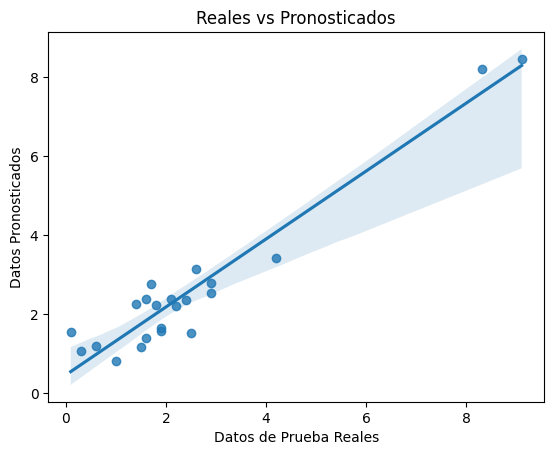

In [29]:
a = y_test.to_frame().reset_index()['Inflación mensual EUA'].to_frame()
b = pd.DataFrame(predicciones, columns = ['predicciones'])
sns.regplot(a.astype('float'), b.astype('float'))
plt.xlabel('Datos de Prueba Reales')
plt.ylabel('Datos Pronosticados')
plt.title('Reales vs Pronosticados')
plt.show()

La gráfica presentada muestra la ecuación calculada mediante el modelo de regresión, asi como los valores reales que se encontraban en los datos de testeo en forma de puntos. Esta gráfica nos permite visualizar qué tan bien se ajusta nuestro modelo a los datos reales. Por lo tanto, mientras los puntos se acercan más a línea, mejor es el pronostico. Mientras que si están más alejadas de la línea, el error es mayor.

Cálculo de la Raíz del Error Cuadrático Medio

Este cálculo nos ayuda a reconocer por cuanto se están equivocando nuestras estimaciones en promedio,
nos podemos dar cuenta de que el modelo está siendo efectivo o tal vez no, ya que en promedio, se pasa por x cantidad de puntos porcentuales, es decir que
si el valor real fue de 5, es muy probable que el pronostico sea 5 + x o 5 - x 

In [30]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicciones))

/efs/default/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [31]:
rmse

0.6239138682054961

## Calculadora

Pronosticar Inflación Manipulando las variables

Con el fin de que se puedan calcular los pronosticos, se creó una calculadora con la ecuación generada a partir del modelo. Por lo tanto, es necesario insertar los datos que va 
solicitando el código, estos son referentes a las variables explicativas, para obtener la inflación como resultado final.

In [33]:
df_pronostico = df.drop('Inflación mensual EUA', axis = 1)
precio_transporte_nuevo = int(input('Insertar Precio de Transporte Mensual'))
precio_petroleo_nuevo = int(input('Insertar Precio de Barril de Petroleo Mensual'))
ingreso_promedio_hora_nuevo = int(input('Insertar Ingreso Promedio Por Hora Mensual'))
produccion_semiconductores_nuevo = int(input('Insertar Producción Mensual de Semiconductores'))
dias_promedio_retraso_nuevo = int(input('Insertar Dias Promedia de Retraso Mensual'))
venta_semiconductores_nuevo = int(input('Insertar producción Venta Mensual de Semiconductores'))
new_row = {'Precio de transporte': precio_transporte_nuevo, 'Precio por barril de petróleo': precio_petroleo_nuevo, 'Ingreso promedio por hora': ingreso_promedio_hora_nuevo, 
           'Producción mensual de semiconductores':produccion_semiconductores_nuevo, 'Dias Promedio de Retraso':dias_promedio_retraso_nuevo, 'Venta mensual de semiconductores':venta_semiconductores_nuevo}

df_pronostico = df_pronostico.append(new_row, ignore_index = True)
datos_normalizados = scaler.fit(df_pronostico)
datos_normalizados = scaler.transform(df_pronostico)
norm_df2 = pd.DataFrame(datos_normalizados, columns = df.columns[:-1])
lista_nueva = norm_df2.iloc[-1].values.tolist()
print('Inflación calculada: ',str(lm.predict([lista_nueva])))

df_pronostico = df_pronostico.head(len(df_pronostico)-1)


Insertar Precio de Transporte Mensual 6583
Insertar Precio de Barril de Petroleo Mensual 46
Insertar Ingreso Promedio Por Hora Mensual 22
Insertar Producción Mensual de Semiconductores 28797854999
Insertar Dias Promedia de Retraso Mensual 3
Insertar producción Venta Mensual de Semiconductores 50938287000


Inflación calculada:  [4.23041592]


/efs/default/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 